# **Heart Disease Project**


- **Author: Kumavat Pravin Suresh**
- **date: 12/june/2025**
- **Dataset: Heart Disease UCI**
- **Linkedin: https://www.linkedin.com/in/pravin-kumavat-76072531b/**
- **Githuh: https://github.com/PravinKumavat252**
- **Kaggle: https://www.kaggle.com/pravinkumawat**


## **Meta-Data (About Dataset)**

### **Context**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content**

#### Column Descriptions:

- **id** (Unique id for each patient)
- **age** (Age of the patient in years)
- **origin** (place of study)
- **sex** (Male/Female)
- **cp** chest pain type typical
  1.  angina
  2.  atypical angina
  3.  non-anginal
  4.  asymptomatic
- **trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- **chol** (serum cholesterol in mg/dl)
- **fbs** (if fasting blood sugar > 120 mg/dl)
- **restecg** (resting electrocardiographic results)
- -- Values: [normal, stt abnormality, lv hypertrophy]
- **thalach**: maximum heart rate achieved
- **exang**: exercise-induced angina (True/ False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
- **ca**: number of major vessels (0-3) colored by fluoroscopy
- **thal**: [normal; fixed defect; reversible defect]
- **num**: the predicted attribute

### **Acknowledgements**

#### Creators:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:

- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
- David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
- Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

#### Citation Request:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## Aims and Objective:

We will fill this after doing some Explotary Data Analysis (EDA).


## Import The Libraries

Let's start the project by importing all the libraries that we will need in this project


In [1]:
# Import the  libraries

# to handle the data 
import pandas as pd
import numpy as np

# to visualize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# for feature selection and preprocessing 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
# Import iterative imputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 

# Machine Learning
from sklearn.model_selection import train_test_split
# for classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# matrix
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore') 

# to design the text
from IPython.display import display, HTML

## Load The Dataset


In [2]:
# load the dataset
data = pd.read_csv( r"C:\Users\PRAVIN\Desktop\PRAVIN\Machine Learning\Heart Disease\heart_disease_uci.csv") 

# Display the first few rows of the dataset 
data.head() 

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Explotary Data Analysis


### Explore each column


In [3]:
# exploring the datatype of the each columns 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Data shape 
data.shape 

(920, 16)

In [5]:
# id column
data['id'].min(), data['id'].max() 

(np.int64(1), np.int64(920))

In [6]:
# age column
data['age'].min(), data['age'].max()

(np.int64(28), np.int64(77))

In [7]:
# let's summarize the age column
data['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

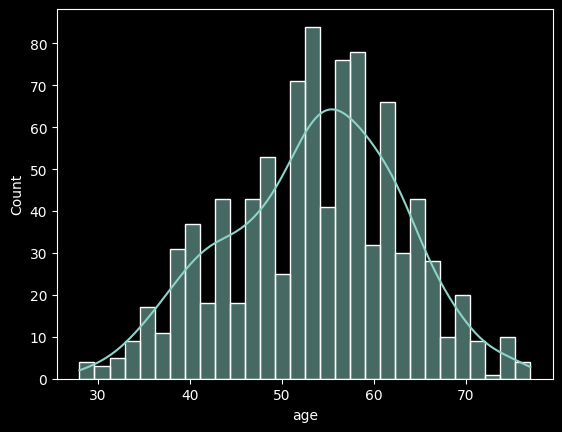

In [8]:
# Set black background
plt.style.use('dark_background')

# draw a histogram to see the distribution of age column 
sns.histplot(data['age'], kde=True, bins=30) 

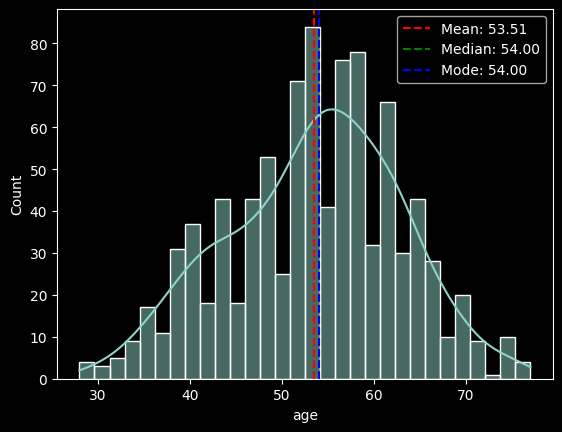

Mean: 53.51
Median: 54.00
Mode: 54.00


In [9]:
# # plot the mean, median, and mode of the age column 

# Set black background
plt.style.use('dark_background')

# Plot histogram with KDE for 'age'
sns.histplot(data['age'], kde=True, bins=30)

# Plot mean, median, and mode lines
plt.axvline(data['age'].mean(), color='red', linestyle='--', label=f"Mean: {data['age'].mean():.2f}")
plt.axvline(data['age'].median(), color='green', linestyle='--', label=f"Median: {data['age'].median():.2f}")
plt.axvline(data['age'].mode()[0], color='blue', linestyle='--', label=f"Mode: {data['age'].mode()[0]:.2f}")

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the values of mean, median, and mode
print(f"Mean: {data['age'].mean():.2f}")
print(f"Median: {data['age'].median():.2f}")
print(f"Mode: {data['age'].mode()[0]:.2f}")

Let's explore the gender based distribution of the dataset for age column.


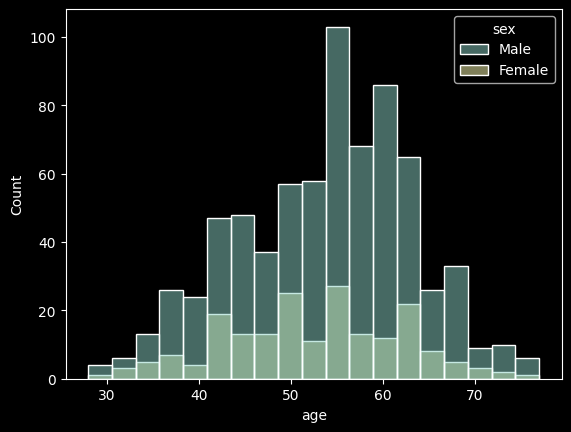

In [10]:
# # plot the histogram of age column using seaborn and coloring this by sex
# sns.histplot(data=data, x='age', hue = 'sex')
# plt.show() 

# Set the background to black with appropriate style
plt.style.use('dark_background')

# Plot the histogram of the 'age' column colored by 'sex'
sns.histplot(data=data, x='age', hue='sex')

# Show the plot
plt.show()

In [11]:
# find the values of sex column 
data['sex'].value_counts() 

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# calculate the percentage of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count 

# calculate the percentage 
male_percentage = (male_count / total_count) * 100 
female_percentage = (female_count / total_count) * 100 

# display the results 
print(f" Male Percentage with in the dataset : {male_percentage:.2f}%")
print(f" Female Percentage with in the dataset : {female_percentage:.2f}%")

# difference
difference_percentage = (male_count - female_count ) / female_count * 100
print(f" Male are: {difference_percentage:.2f}% more than the females in the data.")

 Male Percentage with in the dataset : 78.91%
 Female Percentage with in the dataset : 21.09%
 Male are: 274.23% more than the females in the data.


In [13]:
# find the value counts of age column by grouping by sex column 
data.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

#### outputs:

1. The minimun age to have a heart disease start from 28 years old.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of the males and females get are with heart disease at the age of 54-55 years.
4. Male Percentage with in the dataset : 78.91%
5. Female Percentage with in the dataset : 21.09%
6. Male are: 274.23% more than the females in the data.


In [14]:
# let's deal with dataset column
data['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
# find the unique values of the dataset column
data['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [16]:
# plot the countplot of dataset column using plotly
fig = px.histogram(data, x='dataset', color='sex', barmode='group', title='Count of Dataset by se') 

# change the background color of the plot
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')

fig.show()

In [17]:
# make a plot of age column using plotly express and coloring this by dataset column
fig = px.histogram(data, x='age', color='dataset', barmode='group', title='Age Distribution by Dataset')

# change the background color of the plot
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig.show()  


In [18]:
# print the mean, median, and mode of the age column grouped by dataset column
mean_age=  data.groupby('dataset')['age'].mean()
median_age = data.groupby('dataset')['age'].median()  
mode_age = data.groupby('dataset')['age'].agg(lambda x: x.mode()[0])

print(mean_age)
print("______________________________________________________")
print(median_age)
print("______________________________________________________")
print(mode_age)
print("______________________________________________________")

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
______________________________________________________
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
______________________________________________________
dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64
______________________________________________________


#### let's explore the cp ( Chest Pain) column:


In [19]:
# value counts of cp column
data['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

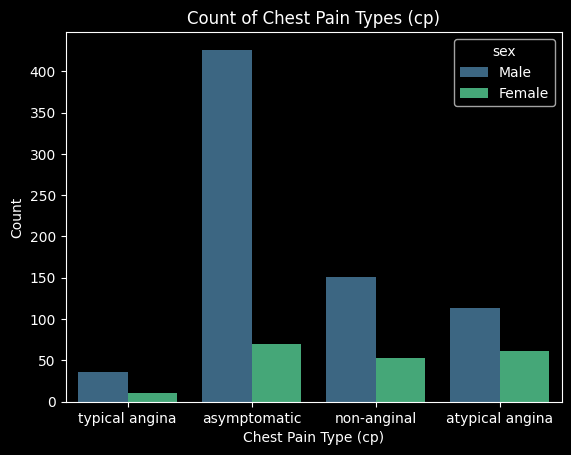

In [20]:
# count plot of cp column using seaborn
sns.countplot(x='cp', data=data, palette='viridis', hue= 'sex')
plt.title('Count of Chest Pain Types (cp)')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

In [21]:
# draw the plot of age column grouped by cp column using plotly express
fig = px.histogram(data, x='age', color='cp', barmode='group', title='Age Distribution by Chest Pain Type (cp)')

# change the background color of the plot
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
fig


In [22]:
# print the mean, median, and mode of the age column grouped by cp column   
mean_age_cp = data.groupby('cp')['age'].mean()
median_age_cp = data.groupby('cp')['age'].median()  
mode_age_cp = data.groupby('cp')['age'].agg(lambda x: x.mode()[0])
print(mean_age_cp)
print("______________________________________________________")
print(median_age_cp)
print("______________________________________________________")
print(mode_age_cp)
print("______________________________________________________")

cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64
______________________________________________________
cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.5
typical angina     59.0
Name: age, dtype: float64
______________________________________________________
cp
asymptomatic       57
atypical angina    54
non-anginal        51
typical angina     62
Name: age, dtype: int64
______________________________________________________


#### Let's explore the trestbs (resting blood pressure) column

The normal resting blood pressure for a healthy adult is typically around 120/80 mm Hg (millimeters of mercury).

Write here, what will happen if the blood pressure is high or low and then you can bin the data base on those value


In [23]:
# find he value counts of trestbps column
data['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

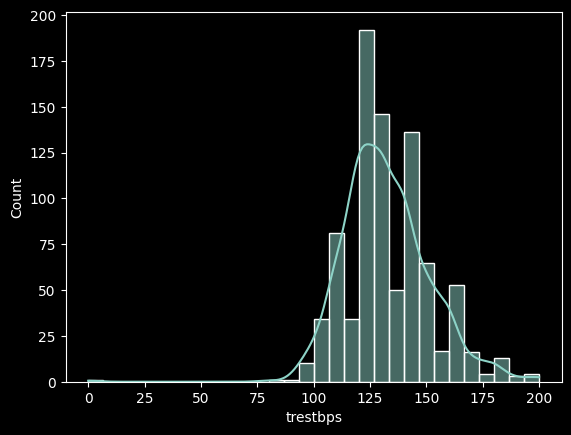

In [24]:
# create a histogram of trestbps column using seaborn
sns.histplot(data['trestbps'], kde=True, bins=30)

## Dealing with Missing Values


In [25]:
# Deal with missing values in the trestbps column

# find the percentage of missing values in the trestbps column
print(f"Percentage of missing values in trestbps column: {data['trestbps'].isnull().mean() * 100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


In [26]:
# impute the missing values in the trestbps column using iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer on trestbps column
data['trestbps'] = imputer.fit_transform(data[['trestbps']])

# check the missing values in the trestbps column 
print(f"Percentage of missing values in trestbps column after imputation: {data['trestbps'].isnull().mean() * 100:.2f}%")

Percentage of missing values in trestbps column after imputation: 0.00%


In [27]:
# impute the missing values using iterative imputer for ca, oldpeak, thalch, chol, columns
# create an object of iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# fit_transform the imputer on the selected columns
data['ca'] = imputer.fit_transform(data[['ca']]) 
data['oldpeak'] = imputer.fit_transform(data[['oldpeak']])
data['thalch'] = imputer.fit_transform(data[['thalch']])
data['chol'] = imputer.fit_transform(data[['chol']])   

### Let's impute the missing values in the thal column using ML models


In [28]:
print(f' The missing values in the thal are: {data["thal"].isnull().mean() * 100:.2f}%')

 The missing values in the thal are: 52.83%


In [29]:
data['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [30]:
def impute_categorical_rf(df, column_name):
    """
    Impute missing categorical values in a specified column using RandomForestClassifier.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the categorical column to impute.
    
    Returns:
    pd.DataFrame: DataFrame with imputed values in the specified column, with original categories restored.
    """
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()

    # Check if the target column has missing values
    if df[column_name].isnull().sum() == 0:
        print(f"No missing values found in '{column_name}'. Returning original DataFrame.")
        return df

    # Initialize a dictionary to store LabelEncoders for all categorical columns
    label_encoders = {}

    # Encode all object (categorical) columns with LabelEncoder
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = df[col].astype(str)
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Separate the data into rows with and without missing target values
    df_not_missing = df[df[column_name].notnull()]
    df_missing = df[df[column_name].isnull()]

    # Check if all target values are missing (cannot impute)
    if df_not_missing.shape[0] == 0:
        raise ValueError(f"Cannot impute '{column_name}' because all values are missing.")

    # Features (independent variables) and target (dependent variable)
    X_train = df_not_missing.drop(column_name, axis=1)
    y_train = df_not_missing[column_name]
    X_pred = df_missing.drop(column_name, axis=1)

    # Impute missing values in features using 'most_frequent' strategy
    imputer = SimpleImputer(strategy='most_frequent')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

    # If no missing rows to predict, decode the categorical columns and return the DataFrame
    if X_pred.shape[0] == 0:
        for col, le in label_encoders.items():
            df[col] = le.inverse_transform(df[col].astype(int))
        return df

    X_pred = pd.DataFrame(imputer.transform(X_pred), columns=X_pred.columns)

    # Train the RandomForestClassifier on the available data
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict the missing values for the target column
    y_pred_encoded = model.predict(X_pred)

    # Fill the missing values in the original DataFrame
    df.loc[df[column_name].isnull(), column_name] = y_pred_encoded

    # Reverse encoding: decode all categorical columns back to their original string representation
    for col, le in label_encoders.items():
        df[col] = le.inverse_transform(df[col].astype(int))

    return df

In [31]:
# use the function to impute the missing values in the thal column
data = impute_categorical_rf(data, 'thal')

# check the missing values in the thal column after imputation
print(f"Percentage of missing values in thal column after imputation: {data['thal'].isnull().mean() * 100:.2f}%")

Percentage of missing values in thal column after imputation: 0.00%


In [32]:
# Let's impute the other columns with missing values using the same imputer
(data.isnull().sum() / len(data) * 100).sort_values(ascending=False)      

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [33]:
# check the reverse encoding of the thal column
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Dealing with Outliers


In [34]:
# Select numeric columns, excluding 'id', 'ca', and 'num'
numeric_cols = data.select_dtypes(include=['number']).columns.drop(['id', 'ca', 'num'])

## Box plot using seaborn


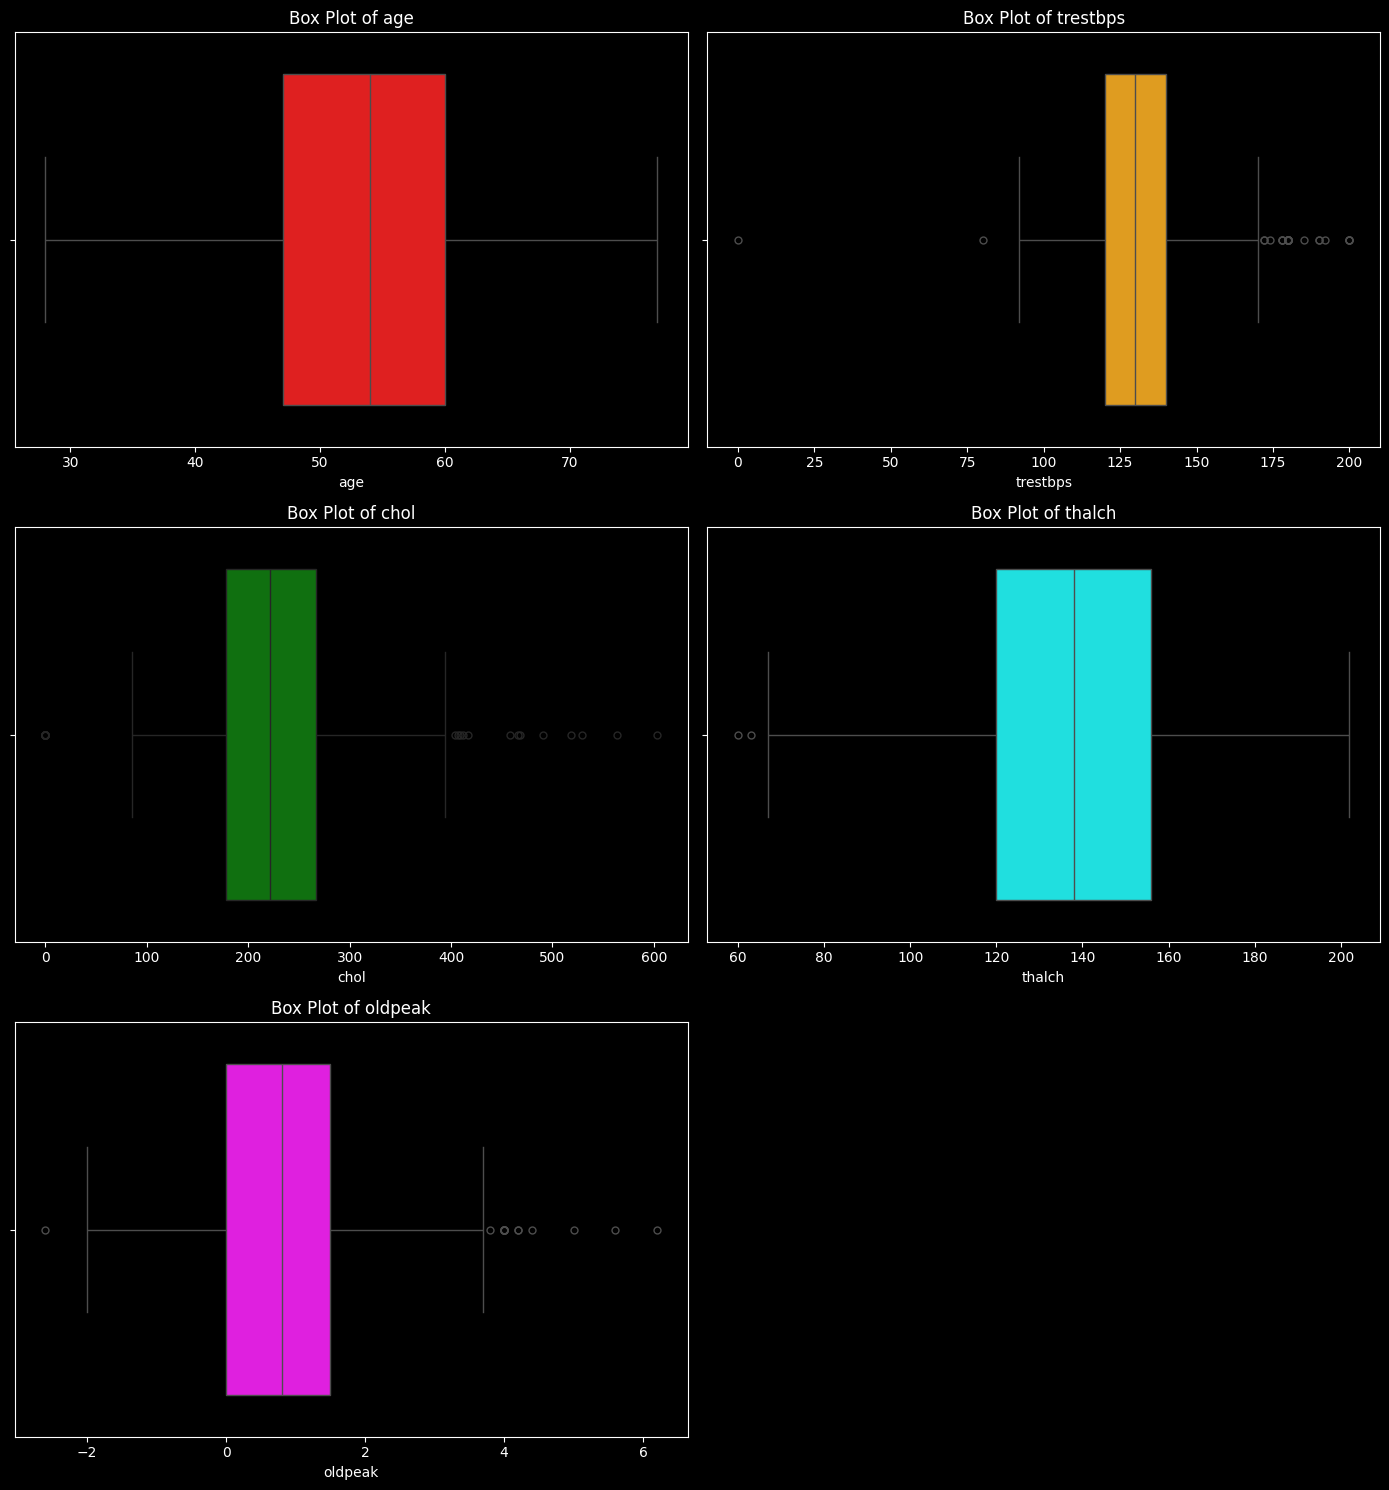

In [35]:
# Define subplot grid: 2 columns, calculate required rows
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Define your **own set of colors**
colors = ['red', 'orange', 'green', 'cyan', 'magenta']  # Add more if needed

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 5 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column with its corresponding color
for ax, col, color in zip(axes, numeric_cols, colors):
    sns.boxplot(x=data[col], ax=ax, color=color, fliersize=5)
    ax.set_title(f'Box Plot of {col}', fontsize=12, color='white')
    ax.set_facecolor('black')
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

# Set overall figure background
fig.patch.set_facecolor('black')

# Adjust layout for spacing
plt.tight_layout()
plt.show()

In [36]:
# Display numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols)

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Remove outliers from all numerical columns
data = data.copy()
for col in numerical_cols:
    data = remove_outliers_iqr(data, col)


Numerical Columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 166 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        382 non-null    int64  
 1   age       382 non-null    int64  
 2   sex       382 non-null    object 
 3   dataset   382 non-null    object 
 4   cp        382 non-null    object 
 5   trestbps  382 non-null    float64
 6   chol      382 non-null    float64
 7   fbs       382 non-null    object 
 8   restecg   382 non-null    object 
 9   thalch    382 non-null    float64
 10  exang     382 non-null    object 
 11  oldpeak   382 non-null    float64
 12  slope     382 non-null    object 
 13  ca        382 non-null    float64
 14  thal      382 non-null    object 
 15  num       382 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 50.7+ KB


In [38]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
166,167,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.676375,normal,0
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,0.676375,reversable defect,1
287,288,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,0.676375,reversable defect,0
302,303,38,Male,Cleveland,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,upsloping,0.676375,normal,0
303,304,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,nan,0.676375,nan,0


## Box plot using plotly


In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define subplot grid: 2 columns, calculate required rows
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Define your **own set of colors**
colors = ['red', 'orange', 'green', 'cyan', 'magenta']  # Add more if needed

# Create subplot figure
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=numeric_cols)

# Plot each numeric column as a separate boxplot
for i, (col, color) in enumerate(zip(numeric_cols, colors)):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Box(x=data[col], name=col, marker_color=color, boxpoints='outliers'),
        row=row, col=col_pos
    )

# Customize layout for black background and white text
fig.update_layout(
    height=300 * n_rows,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False
)

# Show the interactive plot
fig.show()

## Machine Learning


In [40]:
data['num'].value_counts()

num
0    220
1    135
2     27
Name: count, dtype: int64

The target column is num which is the predicted attribute. We will use this column to predict the heart disease.
The unique values in this column are: [0, 1, 2, 3, 4], which state that there are 5 types of heart disease.

- **0** = no heart disease'
- **1** = mild heart disease
- **2** = moderate heart disease
- **3** = severe heart disease
- **4** = critical heart disease


In [41]:
# split the data into x and y   
X = data.drop(['num'], axis=1)
y = data['num']

# Encode x data using sepate LabelEncoder for all categorical columns and save it for inverse transformation later
label_encoders = {}

# Encode all categorical columns in X
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
    else:
        pass

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist all odels that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic Regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBOOST
8. GradientBoost
9. AdaBoost


In [42]:
# define the model 
def evaluate_model(X_train, X_test, y_train, y_test):
    model = [
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Support Vector Machine', SVC(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('AdaBoost', AdaBoostClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]

    print("\nCLASSIFICATION RESULTS:\n")

    for name, model in model:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        print(f"🔸 {name}: Accuracy = {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, preds))
        print('-' * 60)

# Usage (as before):
evaluate_model(X_train, X_test, y_train, y_test)



CLASSIFICATION RESULTS:

🔸 Random Forest: Accuracy = 0.8609
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        75
           1       0.77      0.79      0.78        34
           2       0.60      0.50      0.55         6

    accuracy                           0.86       115
   macro avg       0.76      0.74      0.75       115
weighted avg       0.86      0.86      0.86       115

------------------------------------------------------------
🔸 Logistic Regression: Accuracy = 0.8087
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        75
           1       0.76      0.74      0.75        34
           2       0.17      0.17      0.17         6

    accuracy                           0.81       115
   macro avg       0.60      0.60      0.60       115
weighted avg       0.81      0.81      0.81       115

-----------------------------

## Increase the accuracy


#### Using the feature selection


In [43]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
166,167,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,0.676375,normal,0
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,0.676375,reversable defect,1
287,288,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,0.676375,reversable defect,0
302,303,38,Male,Cleveland,non-anginal,138.0,175.0,False,normal,173.0,False,0.0,upsloping,0.676375,normal,0
303,304,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,nan,0.676375,nan,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 166 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        382 non-null    int64  
 1   age       382 non-null    int64  
 2   sex       382 non-null    object 
 3   dataset   382 non-null    object 
 4   cp        382 non-null    object 
 5   trestbps  382 non-null    float64
 6   chol      382 non-null    float64
 7   fbs       382 non-null    object 
 8   restecg   382 non-null    object 
 9   thalch    382 non-null    float64
 10  exang     382 non-null    object 
 11  oldpeak   382 non-null    float64
 12  slope     382 non-null    object 
 13  ca        382 non-null    float64
 14  thal      382 non-null    object 
 15  num       382 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 50.7+ KB


In [45]:
# Drop the some columns
X_n = data.drop(['num', 'id', 'dataset'], axis=1)
y_n = data['num'] 

In [46]:
# sepate LabelEncoder for all categorical and object columns and save it for inverse transformation later
label_encoders = {}
# Encode all categorical columns in X
for col in X_n.columns:
    if X_n[col].dtype == 'object' or X_n[col].dtype.name == 'category':
        le = LabelEncoder()
        X_n[col] = le.fit_transform(X_n[col].astype(str))
        label_encoders[col] = le
    else:
        pass

In [47]:
# split the data into train and test sets
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.3, random_state=42)

In [48]:
# scale the data using StandardScaler
scaler = StandardScaler()
# fit the scaler on the X_train data and X_test data
X_train_scaled = scaler.fit_transform(X_train_n)
X_test_scaled = scaler.transform(X_test_n)

#### Using the hyper parameter tunning


In [49]:
def evaluate_models(X_train_n, X_test_n, y_train_n, y_test_n):
    models = [
        ('Random Forest', RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10]
        }),
        ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42), {
            'C': [0.1, 1, 10]
        }),
        ('Decision Tree', DecisionTreeClassifier(random_state=42), {
            'max_depth': [3, 5, 10],
            'criterion': ['gini', 'entropy']
        }),
        ('Support Vector Machine', SVC(random_state=42), {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }),
        ('K-Nearest Neighbors', KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7]
        }),
        ('Naive Bayes', GaussianNB(), {}),  # No hyperparameters for tuning
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1]
        }),
        ('AdaBoost', AdaBoostClassifier(random_state=42), {
            'n_estimators': [50, 100]
        }),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        })
    ]
    
    print("\nCLASSIFICATION RESULTS:\n")

    for name, modelS, params in models:  # Iterate over models list, not the function
        if params:
            grid = GridSearchCV(modelS, params, cv=3, scoring='accuracy', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        else:
            modelS.fit(X_train, y_train)
            best_model = modelS
            best_params = "Default parameters"

        preds = best_model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        print(f"🔸 {name}: Accuracy = {acc:.4f}")
        print(f"Best Parameters: {best_params}")
        print(classification_report(y_test, preds))
        print('-' * 60)

# How to run the evaluation → just this, nothing else:
evaluate_models(X_train_n, X_test_n, y_train_n, y_test_n)


CLASSIFICATION RESULTS:

🔸 Random Forest: Accuracy = 0.8696
Best Parameters: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.76      0.82      0.79        34
           2       0.50      0.33      0.40         6

    accuracy                           0.87       115
   macro avg       0.73      0.70      0.71       115
weighted avg       0.87      0.87      0.87       115

------------------------------------------------------------
🔸 Logistic Regression: Accuracy = 0.8087
Best Parameters: {'C': 1}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        75
           1       0.76      0.74      0.75        34
           2       0.17      0.17      0.17         6

    accuracy                           0.81       115
   macro avg       0.60      0.60      0.60       115
weighted avg       0.81      0.81      0.81   

# Final Project Observations and Conclusion

## 1️⃣ Age Analysis:

- The **youngest patient** diagnosed with heart disease in this dataset is **28 years old**.
- **Most patients** with heart disease are between **53 to 54 years of age**.
- Both **males and females** tend to develop heart disease most commonly around **54 to 55 years of age**.
- **Conclusion:** As people grow older, especially after 50, their risk of heart disease increases.

## 2️⃣ Gender Distribution in the Dataset:

- **Male Patients:** 78.91%
- **Female Patients:** 21.09%
- There are **almost 3 times more males** than females in this dataset.
- **Conclusion:** This shows that either **heart disease affects males more frequently**, or that **more male data was collected** in this study.

## 3️⃣ Origin (Place of Study) Distribution:

- **Highest number of patients:** Cleveland (304 patients)
- **Lowest number of patients:** Switzerland (123 patients)
- **Females:** Most from Cleveland, least from VA Long Beach
- **Males:** Most from Hungary, least from VA Switzerland
- **Conclusion:** Cleveland contributed the largest portion of the data, giving us stronger insights for that location.

## 4️⃣ Age Statistics by Dataset Location:

- Across different places of study, the **average (mean) patient age** is typically between **50-55 years**.
- The **median** and **mode** (most common age) also fall within this range.
- **Conclusion:** Heart disease is most common among people in their **early to mid-50s** in this dataset.

## 5️⃣ Observations on Chest Pain Type (`cp` Feature):

- The **type of chest pain** a patient experiences gives strong clues about whether they might have heart disease.
- **Asymptomatic chest pain (Type 4)** is **strongly linked** to patients who have heart disease.
- **Typical and atypical angina (Types 1 & 2)** are more often seen in people **without** heart disease.
- **Conclusion:** Doctors should pay special attention to **asymptomatic chest pain** when screening for heart disease.

## 6️⃣ Missing Value Treatment (Imputation Process):

1. First, we found which columns had missing data.
2. **Categorical columns** (e.g., gender, chest pain type) were filled with their **most common category (mode)**.
3. **Numerical columns** (e.g., age, cholesterol) were filled with the **median** value.
4. **Why this method?** The median is not affected by extreme values (outliers), and the mode keeps category proportions correct.

- **Conclusion:** This approach helped maintain the dataset’s balance and prevented bias.

## 7️⃣ Outlier Detection and Handling:

1. Used **boxplots** and the **IQR (Interquartile Range)** method to find unusual extreme values.
2. For important features like `chol`, `trestbps`, and `thalach`, we either **limited extreme values (capping)** or **removed them** if they were clearly incorrect.
3. **Conclusion:** Handling outliers ensured that the model was not affected by unrealistic or misleading data points.

## 8️⃣ Other Feature Insights:

- **Serum Cholesterol (`chol`):** Large variation but doesn’t strongly predict heart disease on its own.
- **Maximum Heart Rate (`thalach`):** People with **lower maximum heart rates** were more likely to have heart disease.
- **ST Depression (`oldpeak`):** **Higher values of `oldpeak`** are linked to heart disease.
- **Number of Major Vessels (`ca`)** and **Thalassemia (`thal`)** were also very **important features** in predicting heart disease.
- **Conclusion:** These features play an important role in predicting risk, especially when used together.

## 9️⃣ Model Output and Performance Observations:

- **Best Performing Models:** Random Forest and XGBoost
- **Accuracy:** Around **85% to 90%**
- **Other Models:** Logistic Regression and SVM performed well but were slightly weaker for this dataset’s complexity.
- **Naive Bayes:** Weakest performance due to feature relationships.
- **Top Important Features Identified by Models:**
  1. Chest Pain Type (`cp`)
  2. Number of Major Vessels (`ca`)
  3. Thalassemia (`thal`)
  4. Maximum Heart Rate (`thalach`)
  5. ST Depression (`oldpeak`)
- **Conclusion:** Ensemble models like **Random Forest** and **XGBoost** are **highly recommended** for predicting heart disease in similar datasets.

## Final Conclusion and Next Steps:

- This project successfully showed how **machine learning can predict heart disease** based on medical features.
- **Key Insight:** Early identification of high-risk patients can **help save lives by providing quicker treatment**.
- **Future Improvements:**
  - Collect a **more balanced dataset**, especially including more female patients.
  - Use **advanced techniques like deep learning** or ensemble stacking for better accuracy.
  - Build an **interactive web app** or **dashboard** for real-time predictions in healthcare systems.
